### Задание 1. Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array([sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X])
    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    trees = []
    train_errors = []
    test_errors = []
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            target = gb_predict(X_train, trees, eta)
            tree.fit(X_train, residual(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
            
        trees.append(tree)
    return trees, train_errors, test_errors    

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)
    mse_train = mean_squared_error(y_train, train_prediction)
    test_prediction = gb_predict(X_test, trees, eta)
    mse_test = mean_squared_error(y_test, test_prediction)
    
    return mse_train, mse_test

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
n_trees = 10
max_depth = 5
eta = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

(145.78086022312533, 7237.563205177868)

In [11]:
def get_error_plot2(train_err, test_err):
    x = list(range(0, len(train_err)))
    plt.xlim(0, len(train_err))
    plt.plot(x, train_err, label='train errors')
    plt.plot(x, test_err, label='test errors')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.legend(loc='right')

train_err = []
test_err = []

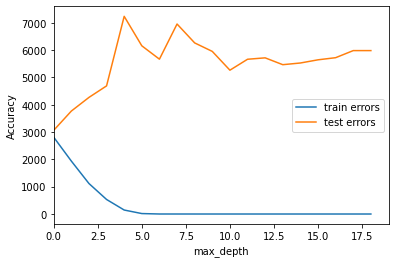

In [12]:
for max_depth in np.arange(1, 20, 1):
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
    mse_train, mse_test = evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
    train_err.append(mse_train)
    test_err.append(mse_test)

get_error_plot2(train_err, test_err)

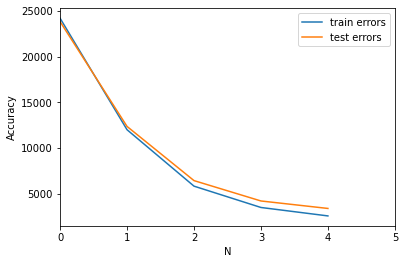

In [13]:
max_depth = 3
eta = 0.1
n_trees = [1, 5, 10, 15, 20]
train_err = []
test_err = []
train_errors = []
test_errors = []

for n_tree in n_trees:
    trees, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, eta)
    mse_train, mse_test = evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
    train_err.append(mse_train)
    test_err.append(mse_test)

x = list(range(0, len(train_err)))
plt.xlim(0, len(train_err))
plt.plot(x, train_err, label='train errors')
plt.plot(x, test_err, label='test errors')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend(loc='upper right');

#### Вывод. С увеличением максимальной глубины дерева ошибка уменьшается на трейне и увеличивается на тесте. Это переобучение. 
#### С увеличением количества деревьев ошибка уменьшается на трейне и на тесте.

### Задание 2. Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [14]:
def gb_fit_st(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    trees = []
    train_errors = []
    test_erreor = []
    for i in range(n_tree // 2):
        tree = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            target = gb_predict(X_train, trees, eta)
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
            
        trees.append(tree)    
    return trees, train_errors, test_errors    

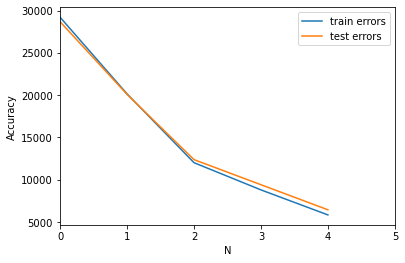

In [16]:
max_depth = 3
eta = 0.1
n_trees = [1,5,10,15,20]
train_err = []
test_err = []
train_errors = []
test_errors = []

for n_tree in n_trees:
    trees, train_errors, test_errors = gb_fit_st(n_tree, max_depth, X_train, X_test, y_train, y_test, eta)
    mse_train, mse_test = evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
    train_err.append(mse_train)
    test_err.append(mse_test)
    
x = list(range(0, len(train_err)))
plt.xlim(0, len(train_err))
plt.plot(x, train_err, label = 'train errors')
plt.plot(x, test_err, label = 'test errors')
plt.xlabel('N')
plt.ylabel('Accuracy')
plt.legend(loc='upper right');